In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import axes

In [2]:
# carico i csv
df1=pd.read_csv('readability_valeria_lex_definitivo.csv', delimiter=',') # generato con readability_definitivo_csv
df2=pd.read_csv('text_analysis.csv') # generato con text analysis.py

In [3]:
# nel df1 c'era una colonna che non volevo (strana, l'ho tolta)
df1.drop(columns='Unnamed: 0', inplace=True)
df1.head()

,Title,Year,Decade,House,Category,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,...,spache_gl,ari_gl,coleman_liau_gl,smog_gl,linsear_write_gl,num_words,num_terms,rttr,cttr,mltd
0,Ice Age Dawn of the Dinosaurs,2009,2000,Blue,Animation,0.260942,0.645334,0.105894,0.134395,0.421893,...,4,0,1,6,2,0.278333,0.423339,0.660256,0.660256,0.659564
1,Horton Hears a Who,2008,2000,Blue,Animation,0.307507,0.576629,0.189541,0.186205,0.425051,...,5,0,1,6,2,0.405235,0.590290,0.781479,0.781479,0.557292
2,Ice Age 2-The Meltdown,2006,2000,Blue,Animation,0.266583,0.645533,0.089133,0.096916,0.426646,...,4,0,1,6,2,0.281229,0.424191,0.657910,0.657910,0.580961
3,Ice Age,2002,2000,Blue,Animation,0.242643,0.688093,0.095904,0.112623,0.406044,...,4,0,1,6,2,0.237622,0.393526,0.663697,0.663697,0.713047
4,Epic,2013,2010,Blue,Animation,0.261901,0.677384,0.079021,0.095754,0.421754,...,4,0,1,6,2,0.420282,0.512351,0.650241,0.650241,0.701945


In [4]:
# per fare il merge dei df anche anno in df2 doveva essere numerico
df2['Year'] = pd.to_numeric(df2['Year'])

In [5]:
# normalizzazione (attenzione, df1 già normalizzato, quindi normalizzo solo df2)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df2[['Movie_len', 'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase','Num_Adjectives','Num_Adverbs','Short_Phrases%']] = min_max_scaler.fit_transform(df2[['Movie_len', 'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase','Num_Adjectives','Num_Adverbs','Short_Phrases%']])
df2

,Title,House,Decade,Year,Category,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs,Short_Phrases%
0,Chicken Run,Aardman,2000,2000,Animation,0.205044,0.135699,0.346723,0.200000,0.236763,0.244318,0.027565
1,Flushed Away,Aardman,2000,2006,Animation,0.509430,0.127349,0.563425,0.090370,0.889111,1.000000,0.007025
2,Wallace And Gromit In The Curse Of The Were-Ra...,Aardman,2000,2005,Animation,0.082237,0.237996,0.399577,0.245926,0.175824,0.115767,0.060761
3,A Shaun the Sheep Movie Farmageddon,Aardman,2010,2019,Animation,0.030263,0.000000,0.000000,0.404444,0.000000,0.000710,0.099137
4,Arthur Christmas,Aardman,2010,2011,Animation,0.391886,0.137787,0.321353,0.242963,0.400599,0.396307,0.153538
...,...,...,...,...,...,...,...,...,...,...,...,...
429,Van Helsing The London Assignment,Universal,2000,2004,Animation,0.055482,0.150313,0.437632,0.183704,0.110889,0.091619,0.032949
430,Curious George 3 Back to the Jungle,Universal,2010,2015,Animation,0.180044,0.137787,0.408034,0.155556,0.234765,0.230824,0.037217
431,Curious George Royal Monkey,Universal,2010,2019,Animation,0.250000,0.123173,0.353066,0.164444,0.327672,0.268466,0.252678
432,The Land Before Time XIV-Journey Of The Brave,Universal,2010,2016,Animation,0.220395,0.112735,0.366808,0.207407,0.233766,0.294744,0.072248


In [6]:
# merge dei df
df= df1.merge(df2, left_on=('Title', 'Year','Decade', 'House','Category'), right_on=('Title', 'Year', 'Decade', 'House', 'Category'), copy=False)
df

,Title,Year,Decade,House,Category,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,...,rttr,cttr,mltd,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs,Short_Phrases%
0,Ice Age Dawn of the Dinosaurs,2009,2000,Blue,Animation,0.260942,0.645334,0.105894,0.134395,0.421893,...,0.660256,0.660256,0.659564,0.228947,0.110647,0.339323,0.158519,0.277722,0.290483,0.049831
1,Horton Hears a Who,2008,2000,Blue,Animation,0.307507,0.576629,0.189541,0.186205,0.425051,...,0.781479,0.781479,0.557292,0.330921,0.154489,0.334038,0.217778,0.398601,0.360085,0.141358
2,Ice Age 2-The Meltdown,2006,2000,Blue,Animation,0.266583,0.645533,0.089133,0.096916,0.426646,...,0.657910,0.657910,0.580961,0.210526,0.112735,0.366808,0.177778,0.249750,0.267756,0.048435
3,Ice Age,2002,2000,Blue,Animation,0.242643,0.688093,0.095904,0.112623,0.406044,...,0.663697,0.663697,0.713047,0.180482,0.102296,0.362579,0.161481,0.223776,0.223722,0.037136
4,Epic,2013,2010,Blue,Animation,0.261901,0.677384,0.079021,0.095754,0.421754,...,0.650241,0.650241,0.701945,0.305702,0.100209,0.391121,0.142222,0.353646,0.450994,0.156120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Goosebumps Haunted Halloween,2018,2010,Sony,Animation,0.280113,0.613753,0.142197,0.159954,0.400433,...,0.668449,0.668449,0.707792,0.351316,0.121086,0.313953,0.205926,0.351648,0.377131,0.086833
428,Hotel Transylvania 3 Summer Vacation,2018,2010,Sony,Animation,0.316526,0.557591,0.120414,0.124111,0.437731,...,0.670306,0.670306,0.561627,0.251096,0.133612,0.368922,0.195556,0.308691,0.336648,0.059482
429,The Smurfs 2,2013,2010,Sony,Animation,0.224191,0.728094,0.074150,0.062766,0.364406,...,0.497357,0.497357,0.445959,0.188596,0.077244,0.350951,0.139259,0.213786,0.236506,0.083275
430,Hotel Transylvania,2012,2010,Sony,Animation,0.273634,0.632862,0.120254,0.103620,0.412512,...,0.695079,0.695079,0.637337,0.350658,0.123173,0.427061,0.063704,0.391608,0.441761,0.070259


In [7]:
v_name = []
v_type = []
v_domain = []
v_is_null = []
for c in df.columns:
    col_list = df[c]
    v_name.append(c)
    v_type.append(type(col_list[0]))
    v_domain.append(sorted(col_list.unique()))
    v_is_null.append(col_list.isnull().any())
    
d = {'variable': v_name, 'type': v_type, 'domain': v_domain, 'any_null': v_is_null}
pd.DataFrame(data=d).set_index('variable')

,type,domain,any_null
variable,,,
Title,<class 'str'>,"[101 Dalmatians, 102 Dalmatians, A Bug's Life,...",False
Year,<class 'numpy.int64'>,"[1937, 1940, 1941, 1942, 1943, 1944, 1946, 194...",False
Decade,<class 'numpy.int64'>,"[1930, 1940, 1950, 1960, 1970, 1980, 1990, 200...",False
House,<class 'str'>,"[Aardman, Blue, Disney, Dreamworks, Illuminati...",False
Category,<class 'str'>,"[Animation, Animation + Live Action, Live Action]",False
Flesch_Kincaid_score,<class 'numpy.float64'>,"[0.0, 0.15715881653470146, 0.1592853536920288,...",False
flesch_score,<class 'numpy.float64'>,"[0.0, 0.024436558626477426, 0.0563986521724457...",False
dale_chall_score,<class 'numpy.float64'>,"[0.0, 0.007678405001533163, 0.0153912485007002...",False
spache_score,<class 'numpy.float64'>,"[0.0, 0.01041469941206774, 0.01251208209446463...",False


In [8]:
# vari sotto df per casa di produzione e genere (nel caso Disney)

df_disney=df[(df['House'] == 'Disney') & (df['Category'] == 'Animation')]
df_disney_liveaction=df[(df['House'] == 'Disney') & (df['Category'] == 'Live Action')]
df_disney_la=df[(df['House'] == 'DISNEY') & (df['Category'] == 'Animation + Live Action')]
df_aardman=df[df['House'] == 'Aardman']
df_blue=df[df['House'] == 'Blue']
df_dreamworks=df[df['House'] == 'Dreamworks']
df_illumination=df[df['House'] == 'Illumination']
df_paramount=df[df['House'] == 'Paramount']
df_sony=df[df['House'] == 'Sony']
df_studioghibli=df[df['House'] == 'StudioGhibli']
df_universal=df[df['House'] == 'Universal']

In [9]:
df_disney_liveaction.head()

,Title,Year,Decade,House,Category,Flesch_Kincaid_score,flesch_score,dale_chall_score,spache_score,ari_score,...,rttr,cttr,mltd,Movie_len,Avg_WordLen_Movie,Avg_PhrLen_Movie,Avg_WordLen_Phrase,Num_Adjectives,Num_Adverbs,Short_Phrases%
184,Night Crossing,1982,1980,Disney,Live Action,0.295431,0.601338,0.047919,0.070722,0.457680,...,0.676640,0.676640,0.670337,0.267105,0.129436,0.356237,0.208889,0.361638,0.349432,0.129605
185,The Devil and Max Devlin,1981,1980,Disney,Live Action,0.328585,0.604587,0.153872,0.213688,0.436209,...,0.661695,0.661695,0.434298,0.399561,0.102296,0.385835,0.136296,0.584416,0.595170,0.328053
186,Midnight Madness,1980,1980,Disney,Live Action,0.256146,0.677421,0.120454,0.148171,0.421190,...,0.669808,0.669808,0.561676,0.383114,0.112735,0.337209,0.197037,0.395604,0.376420,0.138424
187,The Journey of Natty Gann,1985,1980,Disney,Live Action,0.159285,0.813737,0.099378,0.097611,0.334872,...,0.526890,0.526890,0.469344,0.239254,0.060543,0.289641,0.158519,0.222777,0.266335,0.143543
188,Cheetah,1989,1980,Disney,Live Action,0.316678,0.578773,0.089508,0.103939,0.446097,...,0.712641,0.712641,0.801701,0.276316,0.127349,0.382664,0.211852,0.366633,0.396307,0.046044


In [10]:
# indici divisi in indexes -- generale, indexes_scores -- score indici complessità, indexes_gl -- grade levels complessità
# indexes_elena -- indici elaborati da Elena 

indexes=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year',]]
meandf=df_disney[indexes+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

indexes_scores=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year','Flesch_Kincaid_gl', 'flesch_gl', 'spache_gl','ari_gl', 'coleman_liau_gl',  'smog_gl', 'linsear_write_gl', 'Movie_len', 'dale_chall_gl', 'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase','Num_Adjectives', 'Num_Adverbs', 'Short_Phrases%', 'num_words', 'num_terms', 'rttr', 'cttr', 'mltd', 'spache_score']]
meandf_scores=df_disney[indexes_scores+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

indexes_gl=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year','Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score', 'Movie_len', 'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase','Num_Adjectives', 'Num_Adverbs', 'Short_Phrases%', 'num_words', 'num_terms', 'rttr', 'cttr', 'mltd']]
meandf_gl=df_disney[indexes_gl+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

indexes_elena=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year','Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score', 'Flesch_Kincaid_gl', 'flesch_gl', 'dale_chall_gl', 'spache_gl','ari_gl', 'coleman_liau_gl',  'smog_gl', 'linsear_write_gl', 'rttr', 'cttr', 'mltd']]
meandf_elena=df_disney[indexes_elena+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

indexes_rich=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year','Flesch_Kincaid_gl', 'flesch_gl', 'dale_chall_gl', 'spache_gl','ari_gl', 'coleman_liau_gl',  'smog_gl', 'linsear_write_gl','Flesch_Kincaid_score', 'flesch_score', 'dale_chall_score', 'spache_score', 'ari_score', 'coleman_liau_score', 'smog_score', 'linsear_write_score', 'Avg_WordLen_Movie', 'Avg_PhrLen_Movie', 'Avg_WordLen_Phrase', 'Short_Phrases%' ]]
meandf_rich=df_disney[indexes_rich+['Decade']].groupby(['Decade']).agg([np.mean, np.std])



In [14]:
# indici selezionati per l'analisi

indexes_selected=[c for c in df_disney.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year', 'flesch_gl', 'dale_chall_gl','linsear_write_score', 'ari_gl','spache_gl', 'coleman_liau_gl','Flesch_Kincaid_gl', 'smog_gl', 'linsear_write_gl', 'flesch_score', 'dale_chall_score', 'spache_score', 'Short_Phrases%','rttr', 'Avg_WordLen_Movie', 'Avg_WordLen_Phrase']]
                                                            
mean_sel_ind =df_disney[indexes_selected+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

In [ ]:
meandf_rich.head()

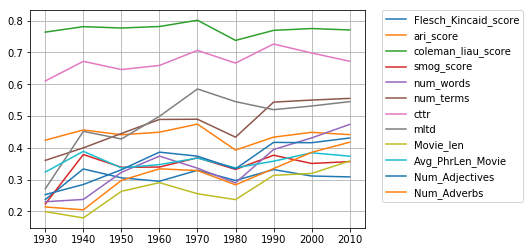

In [15]:
# indici selezionati 

for i in indexes_selected: 
    
    y=mean_sel_ind[i]['mean'].values
    x=mean_sel_ind.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()



/Users/valeriaguttilla/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


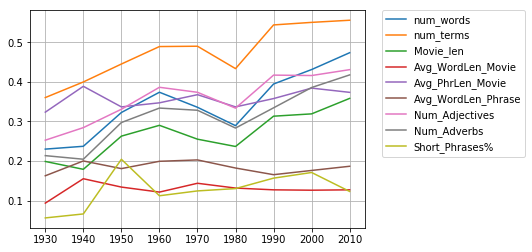

In [11]:
# indici elena
for i in indexes_elena: 
    
    y=meandf_elena[i]['mean'].values
    x=meandf_elena.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()



In [12]:
from matplotlib import axes

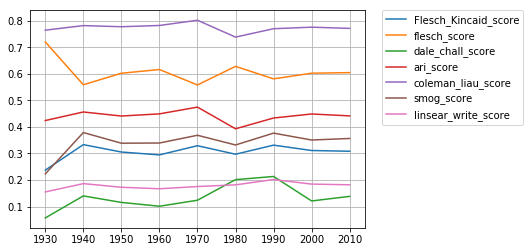

In [16]:
# indici score
for i in indexes_scores: 
   
    
    y=meandf_scores[i]['mean'].values
    x=meandf_scores.index.values
    #plt.subplot(111)
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
plt.grid()
plt.show()

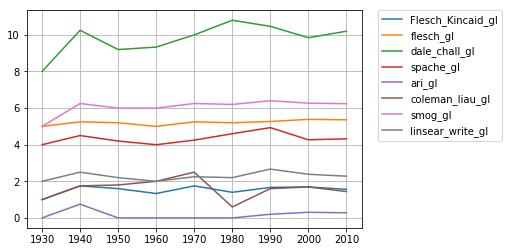

In [17]:
# indici grade level
for i in indexes_gl: 
    
    y=meandf_gl[i]['mean'].values
    x=meandf_gl.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

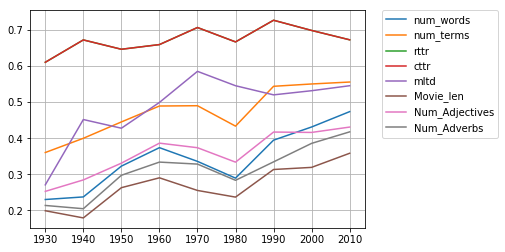

In [19]:
# indici lexical richness
for i in indexes_rich: 
    
    y=meandf_rich[i]['mean'].values
    x=meandf_rich.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()

plt.show()

In [ ]:
indexes_rich

In [ ]:
meandf_rich['cttr']['mean']

In [ ]:
# per plottare solo alcune features selezionate 

selected_indexes=[c for c in df_disney.columns if c in ['Movie_len',
 'Avg_WordLen_Movie',
 'Avg_PhrLen_Movie',
 'Avg_WordLen_Phrase',
 'Num_Adjectives',
 'Num_Adverbs',
 #'Short_Phrases%',
 'Flesch_Kincaid_score',
 'ari_score',
 #'coleman_liau_score',
 'smog_score',
 'linsear_write_score']]
meandf_selected=df_disney[selected_indexes+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

In [ ]:
# features selezionate 
for i in selected_indexes: 
 
    y=meandf[i]['mean'].values
    x=meandf.index.values
    plt.subplot()


    plt.plot(x,y, label=i)
    plt.grid(True)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:
# bar charts per un indice preciso

plt.figure(figsize=(18,18))
#fig, ax = plt.subplots()

i=1
for d in range(1940,2010 +1,10):
    ddf=df_disney[df_disney['Decade']== d]
    # inserire all'interno di ddf[] l'indice selezionato
    x=ddf['flesch_gl'].values
    ax=plt.subplot(3,3,i)  
    movies= ddf['Title'].values
    y_pos = np.arange(len(movies))
    ax.set_yticks(y_pos)
    ax.set_yticklabels(movies)
    length=x
    ax.barh(y_pos, length, align='center')  
        
    i+=1
plt.show()  

In [ ]:
# bar charts generale di indice selezionato su tutti i film

fig, ax = plt.subplots(figsize=(18,36))

                        # diviso per decade e indice selezionato
df_disney.sort_values(by=['Decade','flesch_score'], inplace= True, ascending=False)
           # mettere l'indice selezionato 
x=df_disney['flesch_score'].values 
movies= df_disney['Title'].values
y_pos = np.arange(len(movies))
ax.set_yticks(y_pos)
ax.set_yticklabels(movies)
length=x
ax.barh(y_pos, length, align='center')  

plt.show()  

ALTRE CASE DI PRODUZIONE

In [20]:
# BLUE 

indexes_selected_blue=[c for c in df_blue.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year', 'flesch_gl', 'dale_chall_gl','linsear_write_score', 'ari_gl','spache_gl', 'coleman_liau_gl','Flesch_Kincaid_gl', 'smog_gl', 'linsear_write_gl', 'flesch_score', 'dale_chall_score', 'spache_score', 'Short_Phrases%','rttr', 'Avg_WordLen_Movie', 'Avg_WordLen_Phrase']]
                                                            
mean_sel_ind_blue =df_blue[indexes_selected_blue+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

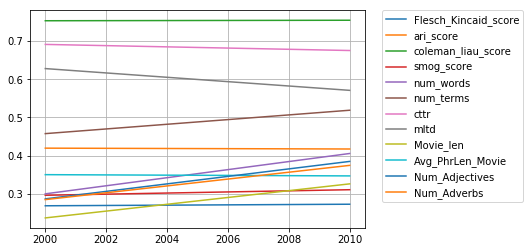

In [21]:

for i in indexes_selected_blue: 
    
    y=mean_sel_ind_blue[i]['mean'].values
    x=mean_sel_ind_blue.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()


In [22]:
# AARDMAN

In [23]:
indexes_selected_aa=[c for c in df_aardman.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year', 'flesch_gl', 'dale_chall_gl','linsear_write_score', 'ari_gl','spache_gl', 'coleman_liau_gl','Flesch_Kincaid_gl', 'smog_gl', 'linsear_write_gl', 'flesch_score', 'dale_chall_score', 'spache_score', 'Short_Phrases%','rttr', 'Avg_WordLen_Movie', 'Avg_WordLen_Phrase']]
                                                            
mean_sel_ind_aa =df_aardman[indexes_selected_aa+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

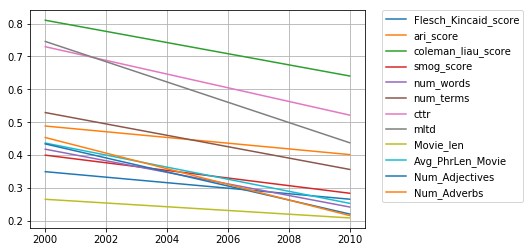

In [24]:
for i in indexes_selected_aa: 
    
    y=mean_sel_ind_aa[i]['mean'].values
    x=mean_sel_ind_aa.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

In [ ]:
df_sony['Decade'].values

In [25]:
# SONY 

indexes_selected_sony=[c for c in df_sony.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year', 'flesch_gl', 'dale_chall_gl','linsear_write_score', 'ari_gl','spache_gl', 'coleman_liau_gl','Flesch_Kincaid_gl', 'smog_gl', 'linsear_write_gl', 'flesch_score', 'dale_chall_score', 'spache_score', 'Short_Phrases%','rttr', 'Avg_WordLen_Movie', 'Avg_WordLen_Phrase']]
                                                            
mean_sel_ind_sony =df_sony[indexes_selected_sony+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

In [26]:
mean_sel_ind_sony

Flesch_Kincaid_score           ari_score           coleman_liau_score  \
                       mean       std      mean       std               mean   
Decade                                                                         
2000               0.253139  0.056552  0.431639  0.054726           0.760885   
2010               0.279137  0.032379  0.423923  0.042041           0.757059   

                 smog_score          num_words            ...      mltd  \
             std       mean      std      mean       std  ...      mean   
Decade                                                    ...             
2000    0.045506   0.302290  0.08019  0.410232  0.098653  ...  0.577849   
2010    0.031108   0.323745  0.03520  0.449225  0.096810  ...  0.577472   

                 Movie_len           Avg_PhrLen_Movie            \
             std      mean       std             mean       std   
Decade                                                            
2000    0.098256  0.330117  0.065549         0.346371  0.040754   
2010    0.134170  0.363871  0.087869         0.350159  0.034452   

       Num_Adjectives           Num_Adverbs            
                 mean       std        mean       std  
Decade                                                 
2000         0.351315  0.065937    0.379735  0.117307  
2010         0.418394  0.115310    0.423473  0.087886  

[2 rows x 24 columns]

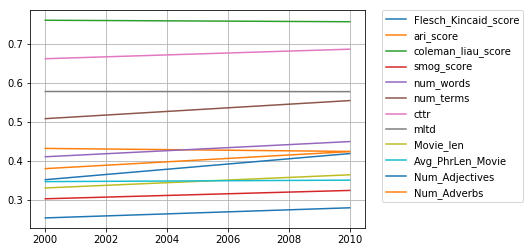

In [27]:
for i in indexes_selected_sony: 
    
    y=mean_sel_ind_sony[i]['mean'].values
    x=mean_sel_ind_sony.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

In [28]:
# STUDIO GHIBLI

indexes_selected_ghibli=[c for c in df_studioghibli.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year', 'flesch_gl', 'dale_chall_gl','linsear_write_score', 'ari_gl','spache_gl', 'coleman_liau_gl','Flesch_Kincaid_gl', 'smog_gl', 'linsear_write_gl', 'flesch_score', 'dale_chall_score', 'spache_score', 'Short_Phrases%','rttr', 'Avg_WordLen_Movie', 'Avg_WordLen_Phrase']]
                                                            
mean_sel_ind_ghibli =df_studioghibli[indexes_selected_ghibli+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

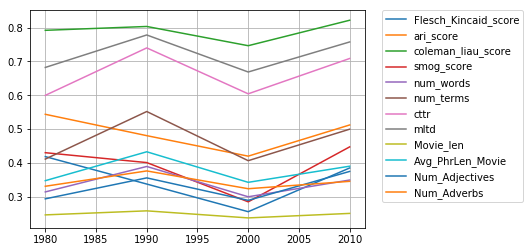

In [29]:
for i in indexes_selected_ghibli: 
    
    y=mean_sel_ind_ghibli[i]['mean'].values
    x=mean_sel_ind_ghibli.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

In [30]:
# Disney Live Action

indexes_selected_la=[c for c in df_disney_liveaction.columns if c not in ['Title', 'House', 'Category', 'Decade', 'Year', 'flesch_gl', 'dale_chall_gl','linsear_write_score', 'ari_gl','spache_gl', 'coleman_liau_gl','Flesch_Kincaid_gl', 'smog_gl', 'linsear_write_gl', 'flesch_score', 'dale_chall_score', 'spache_score', 'Short_Phrases%','rttr', 'Avg_WordLen_Movie', 'Avg_WordLen_Phrase']]
                                                            
mean_sel_ind_la =df_disney_liveaction[indexes_selected_la+['Decade']].groupby(['Decade']).agg([np.mean, np.std])

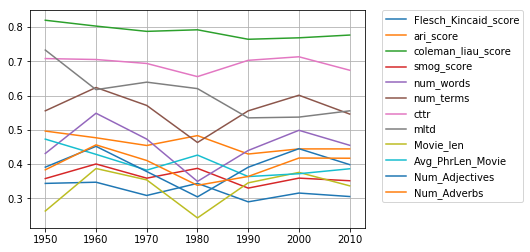

In [31]:
for i in indexes_selected_la: 
    
    y=mean_sel_ind_la[i]['mean'].values
    x=mean_sel_ind_la.index.values
    plt.subplot()
    plt.plot(x,y, label=i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid()
plt.show()

In [16]:
# per generare il csv
df.to_csv('/Users/valeriaguttilla/Desktop/MASTER/PROGETTONE/ANALISI_TESTUALE/COMPLESSITA/general_valeria_elena_rich.csv')